In [1]:
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("../datasets/auto-mpg-processed.csv")

In [3]:
RANDOM_SEED = 2

In [4]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,35.0,4,72.0,69,1613,18.0,49
1,26.0,4,98.0,90,2265,15.5,47
2,23.7,3,70.0,100,2420,12.5,40
3,33.0,4,105.0,74,2190,14.2,39
4,30.5,4,98.0,63,2051,17.0,43


In [5]:
data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
199,36.1,4,91.0,60,1800,16.4,42
138,43.4,4,90.0,48,2335,23.7,40
68,32.0,4,144.0,96,2665,13.9,38
361,24.0,6,200.0,81,3012,17.6,44
226,15.5,8,351.0,142,4054,14.3,41


In [6]:
X = data[['displacement','horsepower','weight','cylinders','acceleration']]
Y = data[['mpg']]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2,random_state=RANDOM_SEED)

In [8]:
x_train.shape,y_train.shape

((313, 5), (313, 1))

In [9]:
x_test.shape,y_test.shape

((79, 5), (79, 1))

In [10]:
linear_model = LinearRegression(normalize=True).fit(x_train,y_train)

In [11]:
print("Training Score: ",linear_model.score(x_train,y_train)) #returns r-squared

Training Score:  0.7009246862784555


In [12]:
y_pred = linear_model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score
print("Testing Score: ",r2_score(y_test,y_pred))

Testing Score:  0.7349047887175023


Here the model has not improved any more than the previous one with three features.

In [14]:
predictors = x_train.columns
predictors

Index(['displacement', 'horsepower', 'weight', 'cylinders', 'acceleration'], dtype='object')

Get the predictors from your x_train data frame, these are the columns of your data frame, and we'll instantiate a pandas series with a coefficient for each predictor. And let's print out these coefficients and see what they are.

In [15]:
linear_model.coef_

array([[-0.00220619, -0.04560414, -0.00504229, -0.35050972, -0.00844347]])

In [16]:
coeff = pd.Series(linear_model.coef_[0],predictors)

print(coeff)

displacement   -0.002206
horsepower     -0.045604
weight         -0.005042
cylinders      -0.350510
acceleration   -0.008443
dtype: float64


 Let's plot the predicted values versus actual values from our dataset using a line chart, and see how closely they track one another.
 
 
 
 


 More features do not necessarily make a better model. What we just performed is what is sometimes called kitchen sink regression where we throw all of the features that we have into our model. Kitchen sink regression does not necessarily perform well because all of our model features may not have good predictive power. And this is why machine learning is all about training and evaluating different models to see what works well in the real world.

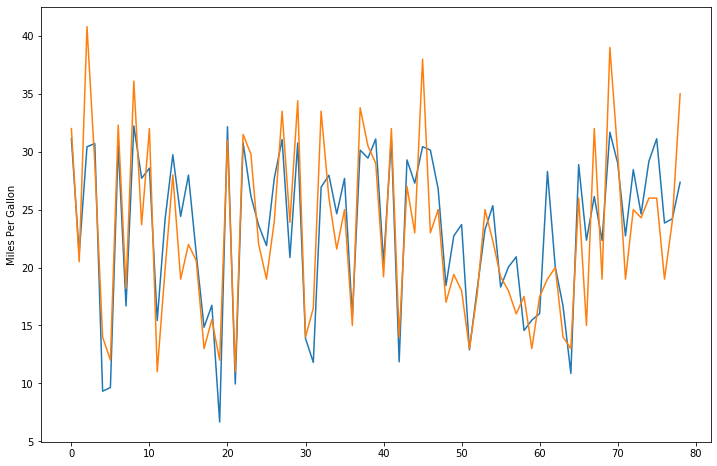

In [17]:
fig , ax = plt.subplots(figsize=(12,8))


plt.plot(y_pred,label = "Predicted")
plt.plot(y_test.values,label = "Actual") # note the use of y_test.values

plt.ylabel("Miles Per Gallon")

plt.show()